# 1.3. Solving the Heat Equation Numerically

The heat equation is a fundamental equation of heat transfer.  But once things get complicated—complex shapes, variable BCs, multiple dimensions—we can't find analytical solutions for the equation. We need to use numerical methods…

<br>

In computational heat transfer, we solve a discretized version of the heat equation at a set number of points on a multidimensional grid that represents our geometry.

<br>

<center>
<img src = https://github.com/MAugspurger/Heat_Transfer_ENGR_321/raw/main/1_Heat_Eqn/Heat_Eqn_images/generic_course_grid.PNG width = 400>
</center>

<br>

Let's explore how we do this


## Discretizing the Heat Equation in 1D

We'll start with a simplified heat equation.  Remember that the equation, in all its glory, looks like this:

<br>

$$\rho C \frac {\partial T}{\partial t} = k \left( \frac{\partial^2 T}{\partial x^2} + \frac{\partial^2 T}{\partial y^2} + \frac{\partial^2 T}{\partial z^2} \right)  + \dot{q} $$

<br>

But if assume that the situation is 1D, steady-state, and has no heat generation, the equation simplifies to this:

<br>

$$ 0 = \frac{\partial^2 T}{\partial x^2}$$

<br>

So that's much better.  But how do we discretize this?

Let's remember that a second derivative is a "gradient of a gradient".  So we can first define a gradient, and then go from there.  Let's start with three points in a 1D temperature field: $T_{m-1}$, $T_m$, and $T_{m+1}$:

<br>

<center>
<img src = https://github.com/MAugspurger/Heat_Transfer_ENGR_321/raw/main/1_Heat_Eqn/Heat_Eqn_images/slopes_clean.PNG width = 250>
</center>

<br>

What is the gradient of temperature halfway between $x_{m-1}$ and $x_m$: that is, at $x_{m-1/2}$?  We could use a Taylor Series to define this gradient, but let's just do it by observation: the gradient is (approximately) the difference in temperature divided by the change in position:

<br>

$$\frac{\partial T}{\partial x}_{x_{m-1/2}} \approx \frac{T_m -T_{m-1}}{\Delta x} ~(orange~ line) $$

<br>

We can use the same logic to find the gradient at $x_{m+1/2}$:

<br>

$$\frac{\partial T}{\partial x}_{x_{m+1/2}} \approx \frac{T_{m+1} -T_{m}}{\Delta x} ~(dark~ red ~line)$$

<br>

And this is what we've done visually:

<br>

<center>
<img src = https://github.com/MAugspurger/Heat_Transfer_ENGR_321/raw/main/1_Heat_Eqn/Heat_Eqn_images/slope.PNG width = 250>
</center>


Now we have two gradients, spaced $\Delta x$ apart from each other.  Now we can find the "gradient of the gradients"!

<br>

<center>
<img src = https://github.com/MAugspurger/Heat_Transfer_ENGR_321/raw/main/1_Heat_Eqn/Heat_Eqn_images/gradient.PNG width = 250>
</center>

<br>

$$ \frac{\partial^2 T}{\partial x^2} = \frac{\partial \left( \frac{\partial T}{\partial x} \right)}{\partial x} = \frac{\frac{T_{m+1} -T_{m}}{\Delta x} - \frac{T_m -T_{m-1}}{\Delta x}}{\Delta x} $$

<br>

Ok, let's simplify that mess:

<br>

$$ \frac{\partial^2 T}{\partial x^2} = \frac{T_{m+1} -2T_m + T_{m-1}}{\Delta x^2} $$

<br>

This discretized equation is called a *finite difference* equation representing a second order differential equation.   Notice that it is an *approximation*: we don't really know the curvature of the line between $x_{m-1}$ and $x_m$, for instance, and just assumed that the slope was the same as the linear slope between the two points.  But it's a solid assumption--as long as $\Delta x$ is small enough!


<br><br><br>

---
🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷<font size = 5> Active Learning </font> 🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷

---

<br>

In [43]:
import pandas as pd
import numpy as np
from urllib.request import urlretrieve

location = 'https://github.com/MAugspurger/ModSimPy_MAugs/raw/main/'
folder = 'Support_files/'
name = 'Embedded_Qs.ipynb'
local, _ = urlretrieve(location + folder + name, name)
%run /content/$name
home = 'https://github.com/MAugspurger/Heat_Transfer_ENGR_321/raw/main/1_Heat_Eqn/Embedded_Qs_and_Data/'
efile = '1_3_Embedded_Qs'

#@title ##### Multiple Choice (Choose the correct answer) { run: "auto", form-width: "50%", display-mode: "form" }
data = display_multC(efile,home,0)
answer = "" # @param ["", "A", "B", "C", "D", "E"]
check_multC(data,answer)

What happens to our discretized term if the 1D temperature field is linear?

A) The second derivative is negative
B) The second derivative is zero
C) The second derivative is positive
D) We'd need more information to know for sure


In [42]:
#@title ##### Multiple Choice (Choose the correct answer) { run: "auto", form-width: "50%", display-mode: "form" }
data = display_multC(efile,home,1)
answer = "" # @param ["", "A", "B", "C", "D", "E"]
check_multC(data,answer)

What happens to our discretized term if the 1D temperature field is the three-node red line shown above?

A) The second derivative is negative
B) The second derivative is zero
C) The second derivative is positive
D) We'd need more information to know for sure


In [41]:
#@title ##### Multiple Choice (Choose the correct answer) { run: "auto", form-width: "50%", display-mode: "form" }
data = display_multC(efile,home,2)
answer = "" # @param ["", "A", "B", "C", "D", "E"]
check_multC(data,answer)

What does it mean that the second derivative of the field at node x_m is negative?

A) The temperature at that node will decrease
B) The temperature at that node will stay the same
C) The temperature at that node will increase
D) We'd need more information to know for sure


---
🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷

---

<br><br><br>



## Setting up a 1D problem

Ok, now we've got a discretized equation.  Let's use it!

<br>

We'll start with a problem that we can solve analytically, so we can validate our numerical solution.  Imagine we have a plate that is insulated on the left side; the plate is generating some heat but is at steady state, and we know the temperature on the left side:

<br>

<center>
<img src = https://github.com/MAugspurger/Heat_Transfer_ENGR_321/raw/main/1_Heat_Eqn/Heat_Eqn_images/six_node_big.PNG width = 250>
</center>

<br>

Here are our system parameters:


In [17]:
# Parameters
q_dot = 25      # W/m3
L = 1           # m
k = 1           # W/mK

# Boundary conditions
T_left = 100      # degrees C
flux_left = 0   # J/m2

In order to discretize the heat equation, we need to simplify it first.

<br>

$$\rho C \frac {\partial T}{\partial t} = k \left( \frac{\partial^2 T}{\partial x^2} + \frac{\partial^2 T}{\partial y^2} + \frac{\partial^2 T}{\partial z^2} \right)  + \dot{q} $$

<br>

It's steady-state, so the left side is zero.  It's 1D, so the y- and z- direction terms are also zero.  This leaves us with:

<br>

$$ \frac{\partial^2 T}{\partial x^2} = -\frac{\dot{q}}{k}$$

<br>

Notice that the right side is a constant.

In [18]:
# Calculate the right hand side constant
gen_term = q_dot/k
print(gen_term)

25.0


## Solving the 1D temperature field

We've got the problem set up; now we can solve the field numerically.  We'll start simple with just six nodes:

<br>

<center>
<img src = https://github.com/MAugspurger/Heat_Transfer_ENGR_321/raw/main/1_Heat_Eqn/Heat_Eqn_images/six_node_small.PNG width = 300>
</center>

<br>

We're going to solve this step-by-step, in a way that doesn't work with more complex problems.  But it will show us the discretized equation at work.

<br>

We have two boundary conditions on the left side: a temperature BC and a flux BC:

<br>

$$ T_{x0} = 100$$

<br>

$$ \frac{dT}{dx}_{left ~surface} = 0$$

<br>

That second BC is called an *adiabatic* BC: it tells us that flux is zero at an insulated boundary, and importantly, it also tells us the value of $T_{x1}$.  Do you see why?

<br>

Let's set our first two points and define our $\Delta x$:

In [19]:
n = 6           # number of nodes
dx = L/(n-1)    # distance between nodes

# Set up a Series to hold the temperature field
import pandas as pd
# Create an array of the x values at the nodes
node_array = np.linspace(0,L,n)
temps = pd.Series(index=node_array, dtype=object)
temps.iloc[0] = T_left
temps.iloc[1] = T_left
temps

0.0    100
0.2    100
0.4    NaN
0.6    NaN
0.8    NaN
1.0    NaN
dtype: object

Our simplified heat equation tells us that the curvature of our temperature field will be in the downward direction, right? (Notice the negative sign).  Here's the discretized version:

<br>

$$ \frac{T_{m+1} -2T_m + T_{m-1}}{\Delta x^2} = -\frac{\dot{q}}{k}$$

<br>

We want to solve for $T_{x2}$, but don't know the temperature of $T_{x3}$.  But we *do* know $T_{x0}$ and $T_{x1}$, so we can rearrange this equation to solve for the $T_{x2}$ (which here is the same as $T_{m+1}$:

<br>

$$T_{m+1} = -\frac{\dot{q}}{k}(\Delta x^2) +2T_m - T_{m-1}$$

<br>

Now use that equation to find $T_{x2}$:


In [20]:
temps.iloc[2] = -gen_term*(dx**2) + 2*temps.iloc[1] - temps.iloc[0]
temps

0.0     100
0.2     100
0.4    99.0
0.6     NaN
0.8     NaN
1.0     NaN
dtype: object

Great!  Now, we know one more point.  Of course, we don't want to solve the problem one point at a time.  So we can set up a loop:


In [21]:
# Loop through nodes until we find a solution
for i in range(n-2):
    temps.iloc[i+2] = -gen_term*(dx**2) + 2*temps.iloc[i+1] - temps.iloc[i]

Ok, now let's plot our solution next to the analytical solution, which is:

$$T(x) = T_{x0}  - \frac{\dot{q}}{2k}x^2$$


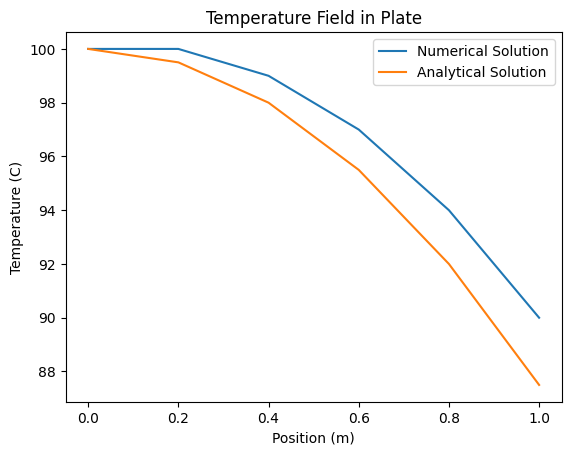

In [22]:
import numpy as np
# Create an array of the x values at the nodes
node_array = np.linspace(0,L,n)
# Create Series that holds the analytical solution
analy_sol = T_left - (gen_term/2.0)*(node_array**2)
temps_analy = pd.Series(index=node_array, data=analy_sol)

# Plot the numerical and analytical solution
temps.plot(label='Numerical Solution',xlabel='Position (m)',
             ylabel='Temperature (C)',
            title='Temperature Field in Plate',
           legend=True)
temps_analy.plot(legend=True, label='Analytical Solution');


So we've got a significant error here: our $\Delta x$ is clearly too big.

In [23]:
print("Right surface (numerical):", temps.iloc[-1])
print("Right surface (analytical):", temps_analy.iloc[-1])

Right surface (numerical): 90.0
Right surface (analytical): 87.5


Play with our simulation by changing the number of nodes, and answer the question below (you just need to change one parameter and rerun the simulation to test different numbers of nodes).

<br><br><br>

---
🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷<font size = 5> Active Learning </font> 🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷

---

<br>

In [40]:
#@title ##### Multiple Choice (Choose the correct answer) { run: "auto", form-width: "50%", display-mode: "form" }
data = display_multC(efile,home,3)
answer = "" # @param ["", "A", "B", "C", "D", "E"]
check_multC(data,answer)

 What is approximately the minimum number of nodes needed to get an error in the right surface temperature of 0.1 degree C or less?

A) 30 nodes
B) 120 nodes
C) 300 nodes
D) 1000 nodes


---
🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷

---

<br><br><br>



## Finding the flux from a temperature field

Finding the flux is simply a matter of using the values from the temperature field: we just need a gradient of temperature to solve Fourier's Law:

$$q\prime\prime = -k \frac{dT}{dx}_{x=L} = -k \frac{T_L-T_{L-1}}{\Delta x}$$

Here's that implementation:

In [25]:
flux = -k * (temps.iloc[-1] - temps.iloc[-2])/dx
flux

20.0

Depending on the last version of `temps` that you created, your answer should approach the analytical solution of $25 ~W/m^2$.

## Setting up a 2D problem

As you might guess, things get more complicated in multiple dimensions.  If we take the simplest case (steady state, no heat generation, 2 dimensional) our simplified heat equation is this:

<br>

$$ 0 = \frac{\partial^2 T}{\partial x^2} + \frac{\partial^2 T}{\partial y^2}$$

<br>

This is called *Laplace's equation*.

<br><br><br>

---
🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷<font size = 5> Active Learning </font> 🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷

---

<br>

In [39]:
#@title ##### Multiple Choice (Choose the correct answer) { run: "auto", form-width: "50%", display-mode: "form" }
data = display_multC(efile,home,4)
answer = "" # @param ["", "A", "B", "C", "D", "E"]
check_multC(data,answer)

Will the solution to Laplace's equation be linear in either or both directions?

A) It will be linear in both directions
B) It will be linear in y, but not x
C) It will be linear in x, but not y
D) It will not be linear in either direction


---
🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷

---

<br><br><br>



As with any vector problem, we can solve the problem in one direction at a time, which is exceedingly helpful.  So the discretized form of this equation is:

<br>

$$0 = \frac{T_{m+1,n} - 2T_{m,n} + T_{m-1,n}}{\Delta x^2} + \frac{T_{m,n+1} - 2T_{m,n} + T_{m,n-1}}{\Delta x^2} $$

<br>

Notice that $m$ and $n$ signify the grid locations in the two different directions:

<br>

<center>
<img src = https://github.com/MAugspurger/Heat_Transfer_ENGR_321/raw/main/1_Heat_Eqn/Heat_Eqn_images/node_2d.PNG width = 300>
</center>

<br>


If our grid is set up in squares so that $\Delta x = \Delta y$, this simplifies even further:

<br>

$$0 = T_{m+1,n} + T_{m-1,n}+ T_{m,n+1} + T_{m,n-1} - 4T_{m,n}$$

<br>

You might notice that this tells us that the average temperature of the 4 nodes around the central node must be equal to the temperature at the central node.  If this were not true, the central node would begin to heat up, and the system would not be at steady-state!

We can't solve this in a step-by-step mode as we did the 1D problem: there are just too many variables in equation.  If we apply this equation to a field with N nodes and boundary conditions, we'd have N equations and N unknowns.  It would not be unusual to have a simulation with an $N > 1,000,000$!

<br>

Instead, such problems are solved using matrix algebra, of the form:

$$A\vec{T} = \vec{C}$$

where A is a matrix that contains the N equations, $T$ is a vector containing the temperatures, and $C$ is a vector containing the "forcing terms": that is, the boundary conditions.  It might look something like this:

<br>

<center>
<img src = https://github.com/MAugspurger/Heat_Transfer_ENGR_321/raw/main/1_Heat_Eqn/Heat_Eqn_images/matrix.PNG width = 500>
</center>

<br>

Notice the diagonal string of $-4$: do you see the $-4$ in the discretized equation above?  The letters represent various boundary conditions: some points have neighbors on the boundary, and others do not.

We won't solve a problem like this in Colab (we could, but it would take some time), but here are a couple solutions to Laplace's equation.  The first one has four temperature boundary conditions:

<br>

<center>
<img src = https://github.com/MAugspurger/Heat_Transfer_ENGR_321/raw/main/1_Heat_Eqn/Heat_Eqn_images/problem_2d.PNG width = 300>
</center>

<br>

Notice that the solution is symmetric, as you might expect by observation.  You could save computational time for this simulation by only simulating half of the domain, and setting a no flux boundary at the middle line (since all isotherms are perpendicular to that middle line!).

<br>

<center>
<img src = https://github.com/MAugspurger/Heat_Transfer_ENGR_321/raw/main/1_Heat_Eqn/Heat_Eqn_images/solution_2d.PNG width = 500>
</center>

<br>

The second example has an adiatic boundary condition on the top boundary.

<br>

<center>
<img src = https://github.com/MAugspurger/Heat_Transfer_ENGR_321/raw/main/1_Heat_Eqn/Heat_Eqn_images/problem_flux.PNG width = 200>
</center>

<br>

Notice that the isotherms at the no flux boundary have to be perpendicular to the boundary: this is a result of the definition of no flux, which states that $\frac{dT}{dx} = 0$ at the boundary.  So just as in our 1D example, the first node inside the boundary is set to the same value as the boundary node.


<br>

<center>
<img src = https://github.com/MAugspurger/Heat_Transfer_ENGR_321/raw/main/1_Heat_Eqn/Heat_Eqn_images/solution_flux.PNG width = 500>
</center>

<br>

---